### Extracting Stock Data from Yahoo Finance

In [2]:
#Installing yfinance library
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing the Yahoo Finance Library
import yfinance as yf

#To extract the stock data of the HDFC Bank between '2021-10-19' and end='2022-10-19'

#NSE symbol for HDFC bank
symbol = "HDFCBANK.NS"

#Creating a ticker object
tickerData = yf.Ticker(symbol)

#get the historical prices for this ticker (perid='1d' implies daily data)
tickerDf = tickerData.history(period='1d', start='2021-10-19', end='2022-10-19')

In [3]:
#The extracted data in a data frame
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-19 00:00:00+05:30,1656.193303,1672.997915,1651.794497,1669.291016,4493770,0.0,0
2021-10-20 00:00:00+05:30,1669.686543,1679.225656,1645.319830,1654.611816,5454284,0.0,0
2021-10-21 00:00:00+05:30,1652.585412,1662.618657,1641.761192,1657.033691,4869095,0.0,0
2021-10-22 00:00:00+05:30,1660.789942,1688.369300,1651.547429,1661.432495,6087777,0.0,0
2021-10-25 00:00:00+05:30,1670.576162,1670.576162,1595.252007,1637.955444,8213383,0.0,0


Created a function named get_stock_data to generate a data frame with stock information.

In [209]:
def get_stock_data(symbol,start_date,end_date):
    tickerData = yf.Ticker(symbol)
    tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)
    tickerDf.index = tickerDf.index.date
    tickerDf.index.names = ['Date']
    return tickerDf

In [210]:
get_stock_data('AXISBANK.NS', start_date='2022-09-19', end_date='2022-10-19').head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-19,789.299988,802.000000,786.700012,798.099976,11427799,0,0
2022-09-20,806.799988,816.200012,802.000000,812.750000,8274079,0,0
2022-09-21,809.250000,816.000000,803.349976,806.549988,6567084,0,0
2022-09-22,805.000000,808.799988,784.299988,789.200012,7804275,0,0
2022-09-23,789.000000,789.000000,764.250000,768.599976,10278805,0,0


Creating a function export_stock_data to generate a data frame of the above kind and export it as a CSV file in the given directory with the name of the file as the symbol of the stock.



In [211]:
def export_stock_data(symbol,start_date,end_date,directory):
    tickerData = yf.Ticker(symbol)
    tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)
    path = directory
    file_path = path + '/' + symbol[:len(symbol)-3] + '.csv'
    #print(file_path)
    tickerDf.to_csv(file_path)  
    return_str = 'File ' +  symbol[:len(symbol)-3] + '.csv' + ' created at ' + path
    return return_str

In [212]:
export_stock_data('AXISBANK.NS','2022-07-19','2022-10-19',r'C:\Users\Kshitiz\Desktop\Work\Study\Python')

'File AXISBANK.csv created at C:\\Users\\Kshitiz\\Desktop\\Work\\Study\\Python'

Exporting the data for 50 stocks present in nifty50 file to csv

In [213]:
import pandas as pd

input_df = pd.read_csv(r'C:\Users\Kshitiz\Desktop\Work\Study\Python\nifty50.csv')
symbol_list = input_df['Symbol']
for symbols in symbol_list:
    name = symbols+'.NS'
    start_date = '2022-07-19'
    end_date = '2022-10-19'
    file_path = os.getcwd()
    #print(file_path)
    directory = file_path + '/' +'NIFTY50'   
    if not os.path.isdir(directory) :
        os.mkdir(directory)
    output_directory = directory
    export_stock_data(name,start_date,end_date,output_directory)

Calculating the daily return for the stock 

In [266]:
def daily_return(df):
    input_df = pd.DataFrame(df)
    price_list = input_df["Close"]
    if df.iloc[0,0] != 0:
        input_df = input_df.reset_index()
        #print(input_df)
    return_close_list = []
    for index, row in input_df.iterrows():
        if index == 0:
            return_close_list.append(0)
        else:
            daily_return = (df.iloc[index]["Close"] - df.iloc[index-1]["Close"])/(df.iloc[index-1]["Close"])*100
            return_close_list.append(daily_return)
    input_df["Return_close"] = return_close_list
    #input_df.to_csv(r'C:\Users\Kshitiz\Desktop\Work\Study\Python\CHECK.csv')
    #input_df = input_df.drop[columns = input_df.columns[0] , axis=1,inplace = True]
    return input_df

In [267]:
daily_return(get_stock_data('AXISBANK.NS', start_date='2022-09-19', end_date='2022-10-19')).head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return_close
0,2022-09-19,789.299988,802.000000,786.700012,798.099976,11427799,0,0,0.000000
1,2022-09-20,806.799988,816.200012,802.000000,812.750000,8274079,0,0,1.835613
2,2022-09-21,809.250000,816.000000,803.349976,806.549988,6567084,0,0,-0.762844
3,2022-09-22,805.000000,808.799988,784.299988,789.200012,7804275,0,0,-2.151135
4,2022-09-23,789.000000,789.000000,764.250000,768.599976,10278805,0,0,-2.610243


Updating the csv files with daiy return price 


In [268]:
import os
#os.listdir(r'C:\Users\Kshitiz\Desktop\Work\Study\Python\NIFTY50')

In [269]:
def get_return(directory):
    file_list = os.listdir(directory)
    #path_list = []
    for files in file_list:
        file_path = directory +'/' + files
        input_df = pd.read_csv(file_path)
        output_df = daily_return(input_df)
        #output_df.drop([index], axis=1)
        #output_df = output_df.iloc[: , :]
        output_df.to_csv(file_path)
    return True

In [270]:
get_return(r'C:\Users\Kshitiz\Desktop\Work\Study\Python\NIFTY50')

True

### Plotting the daily return price of the stock and saving the plot as an image

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
def get_return(directory,plot):
    file_list = os.listdir(directory)
    #path_list = []
    for files in file_list:
        file_path = directory +'/' + files
        input_df = pd.read_csv(file_path)
        input_df['Date'] = pd.to_datetime(input_df['Date'])
        input_df['Date'] = input_df['Date'].dt.date
        output_df = daily_return(input_df)
        if plot:
            plt.figure(figsize=(10,6))
            plt.plot(input_df["Date"],input_df["Return_close"])
            plt.xlabel("Date")
            plt.ylabel("Return Close")
            file_path = os.getcwd()
                #print(file_path)
            directory = file_path + '/' +'NIFTY50' 
            if not os.path.isdir(directory) :
                os.mkdir(directory)
            save_path = directory + '/' + 'Graphs' + '/' + files[:-4] + '.jpeg'
            plt.savefig(save_path)
        output_df.to_csv(file_path)
    return True

C:\Users\Kshitiz\AppData\Local\Temp\ipykernel_19736\2039859765.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,6))


True

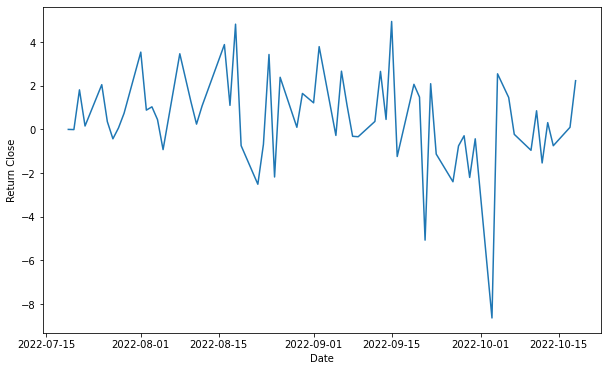

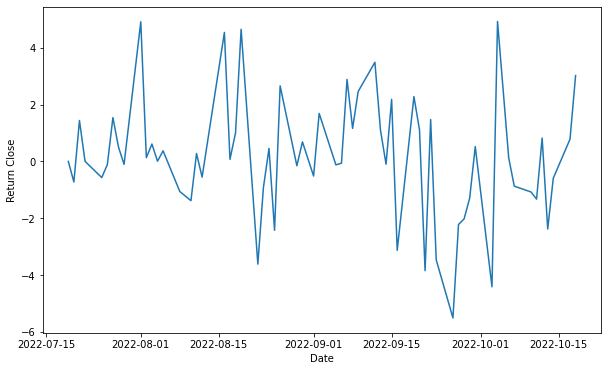

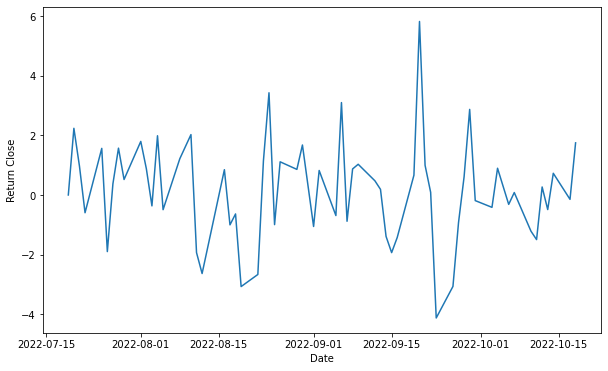

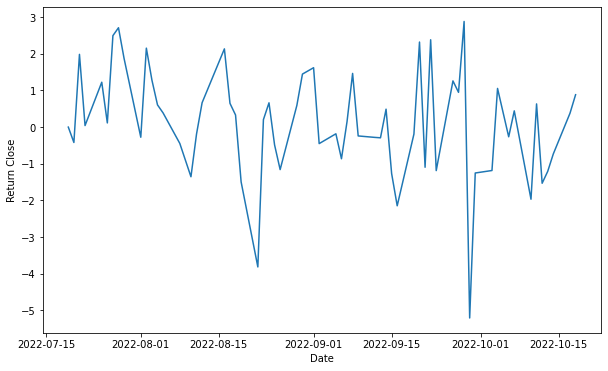

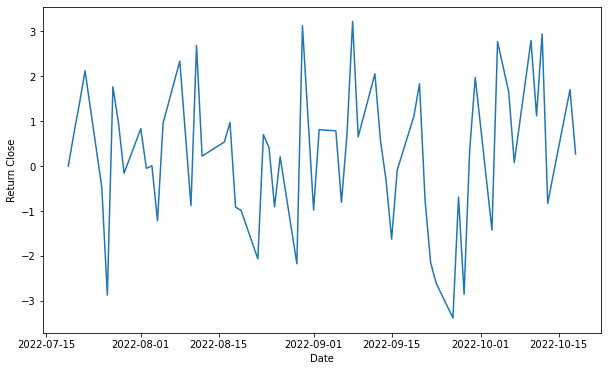

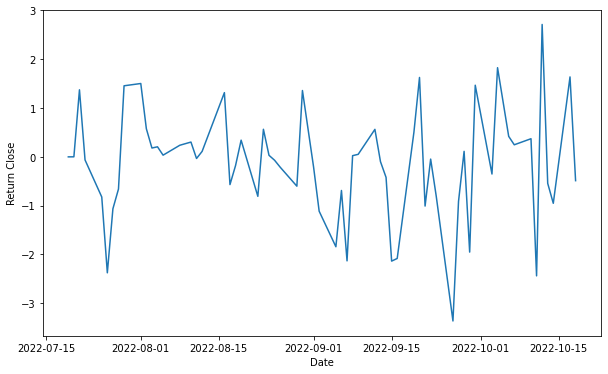

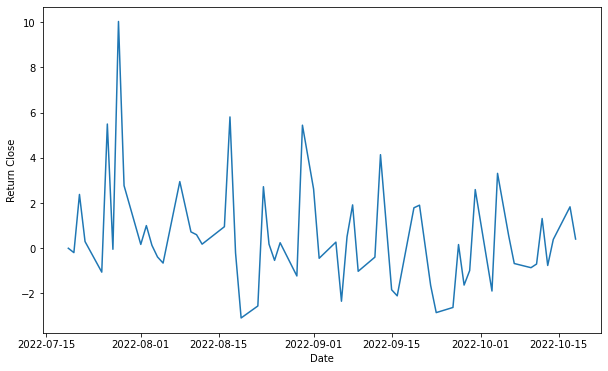

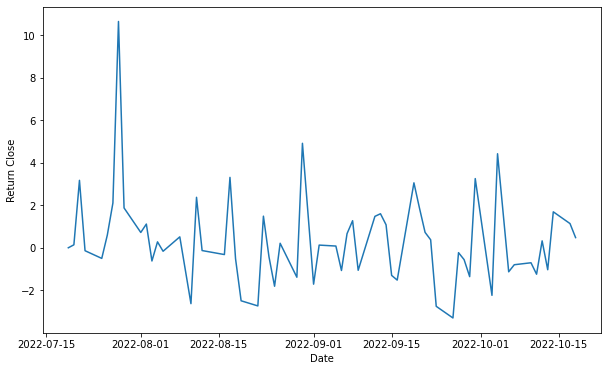

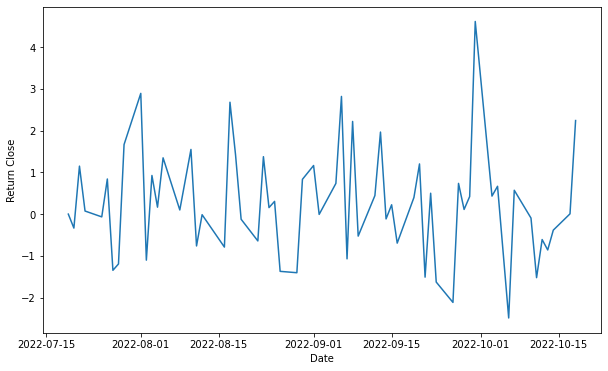

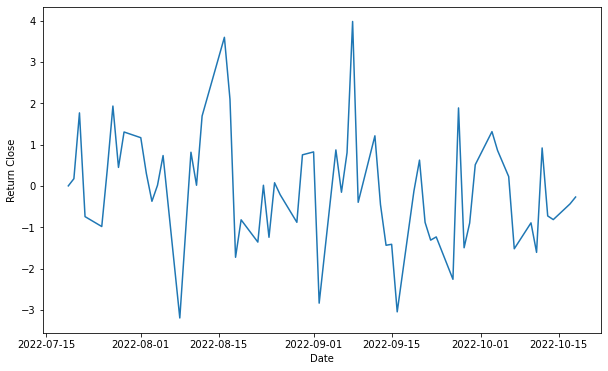

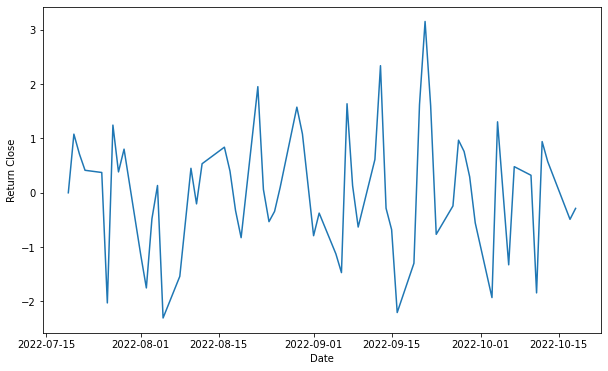

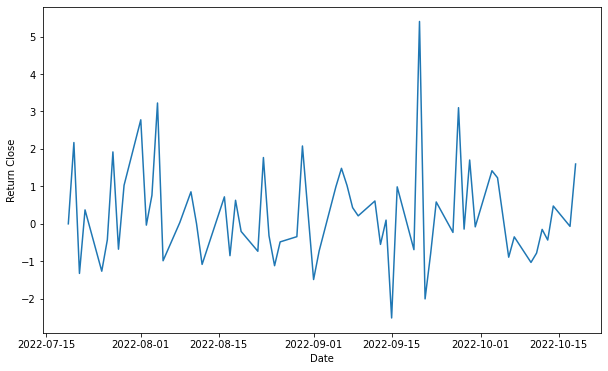

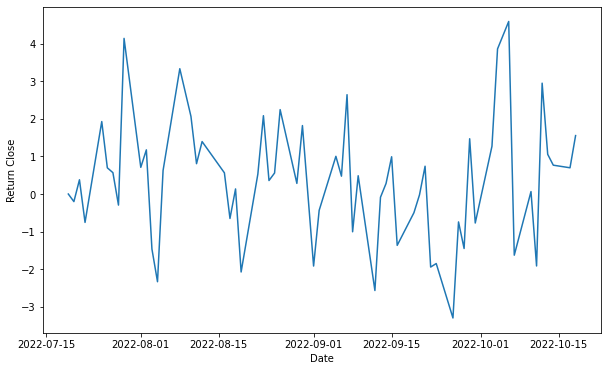

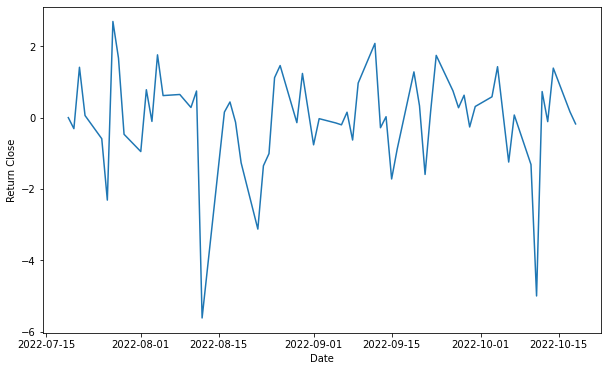

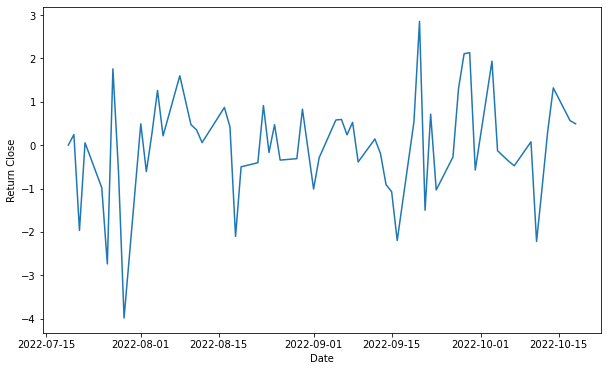

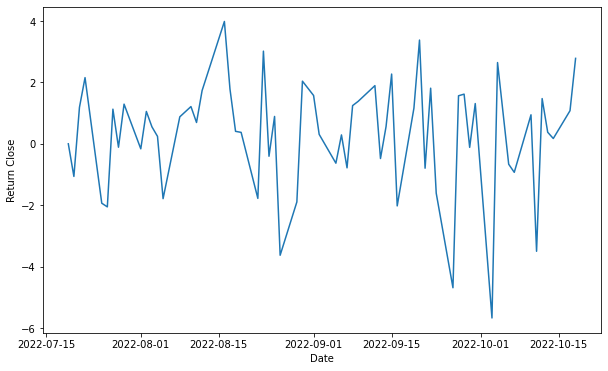

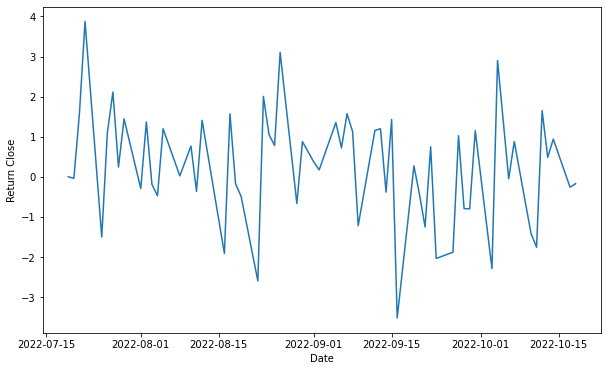

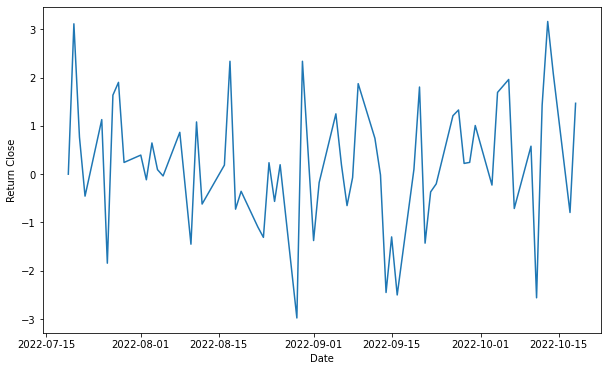

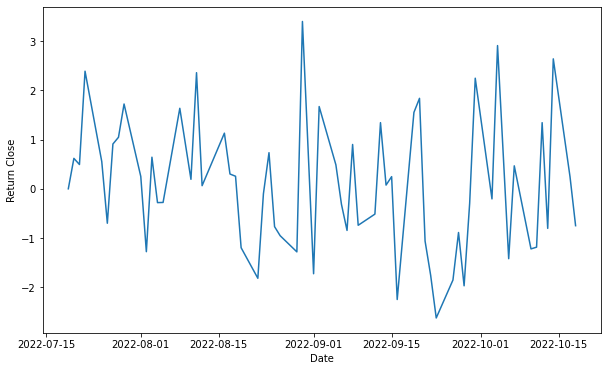

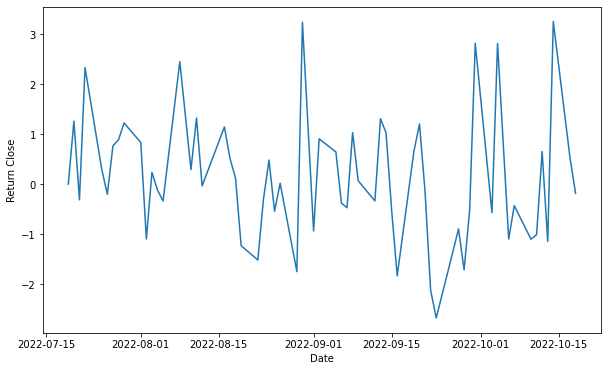

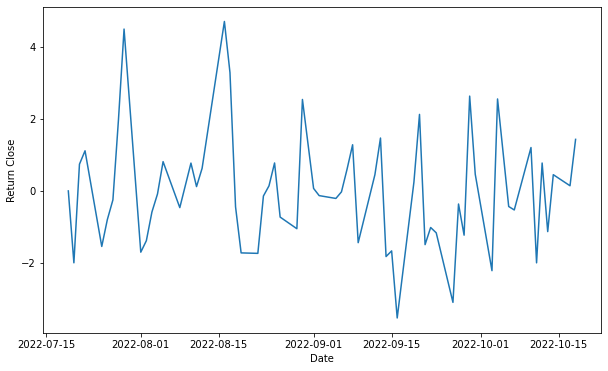

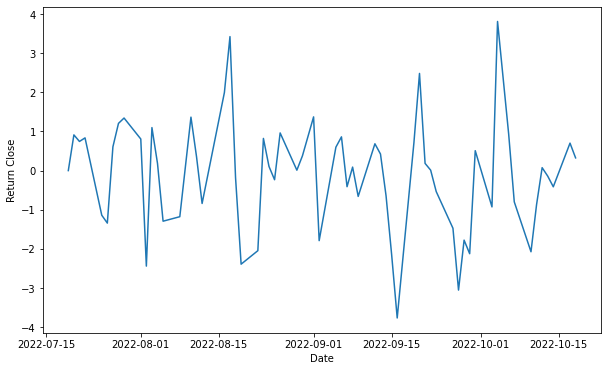

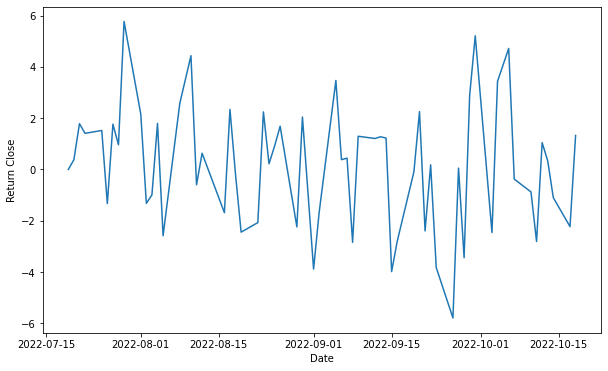

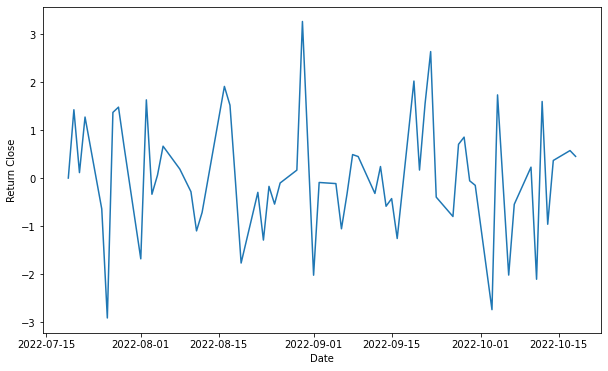

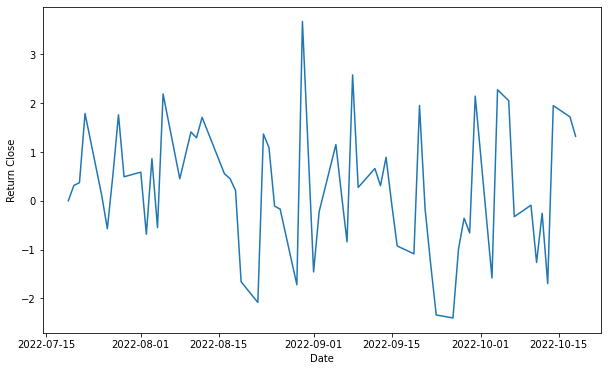

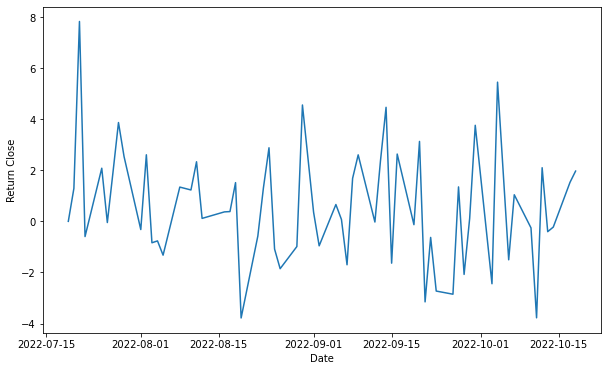

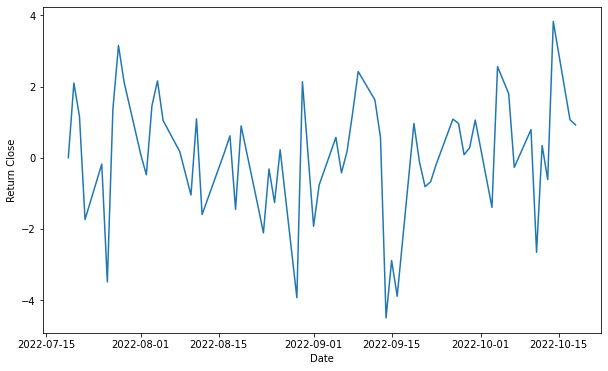

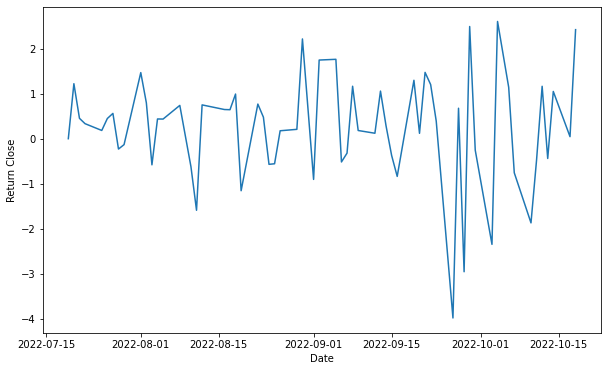

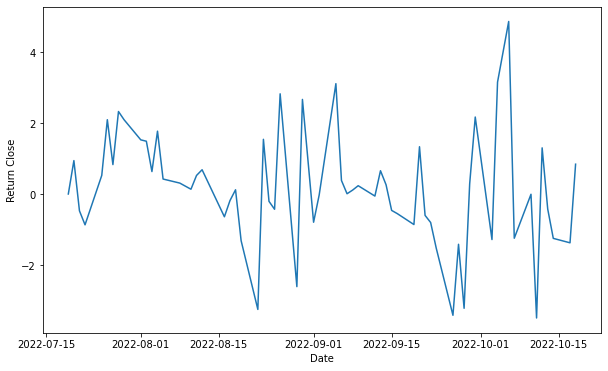

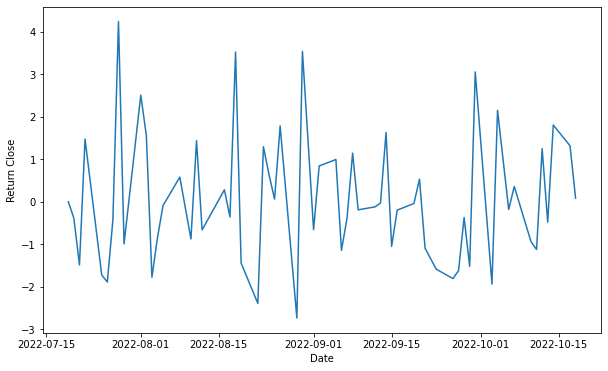

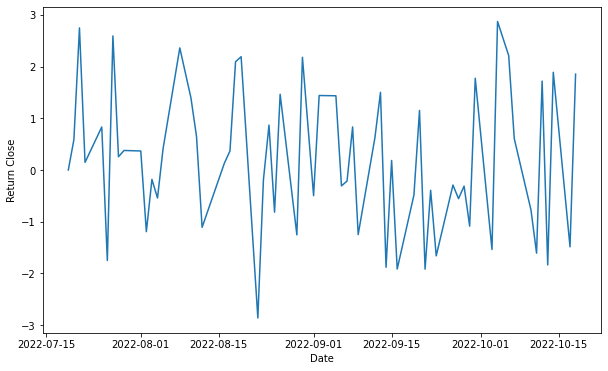

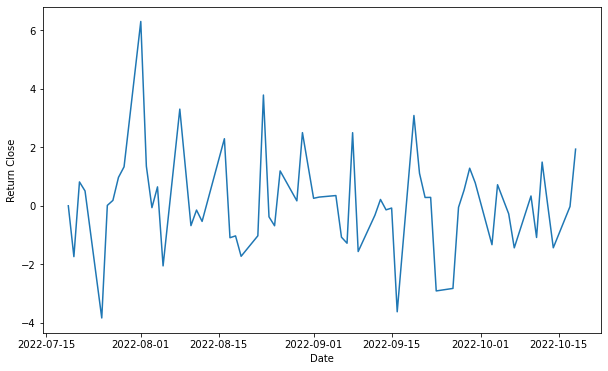

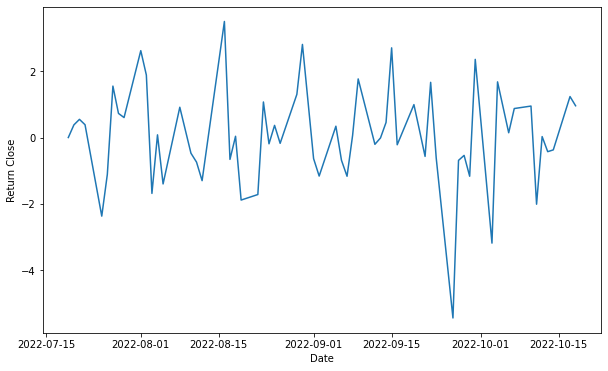

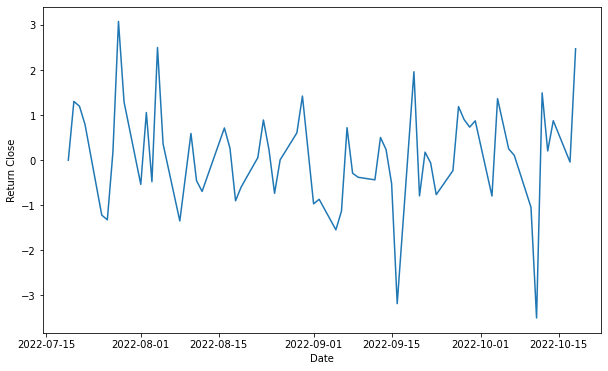

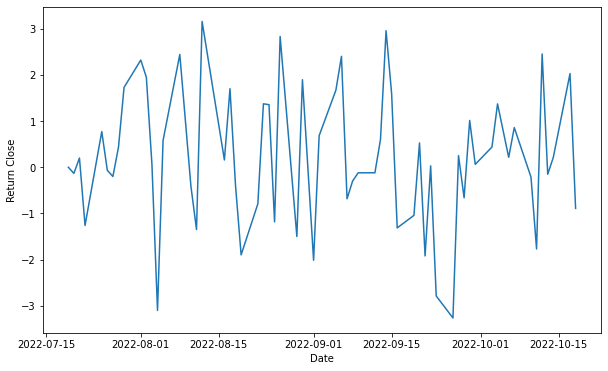

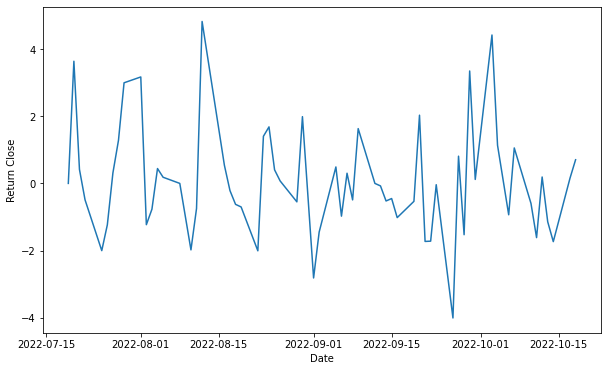

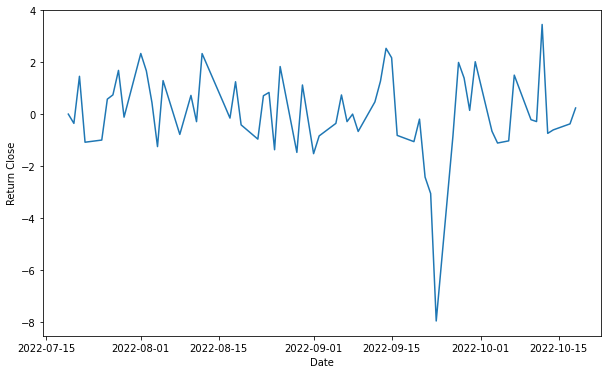

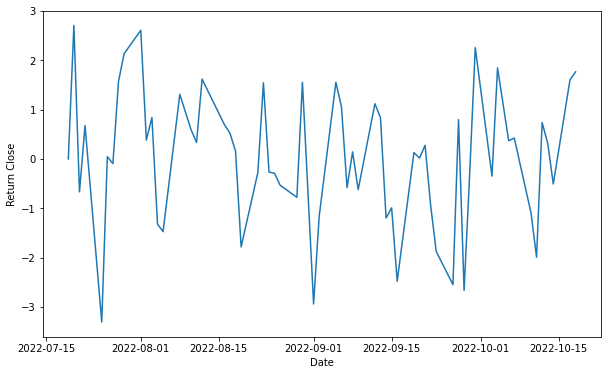

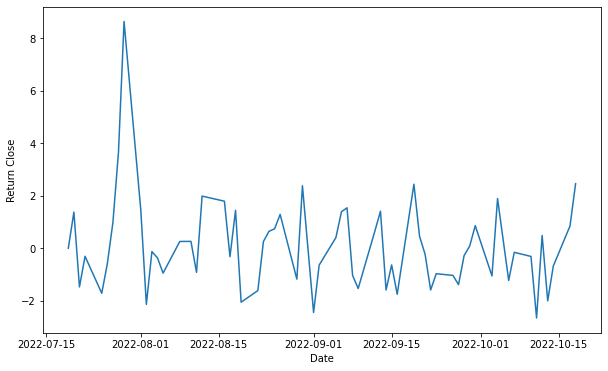

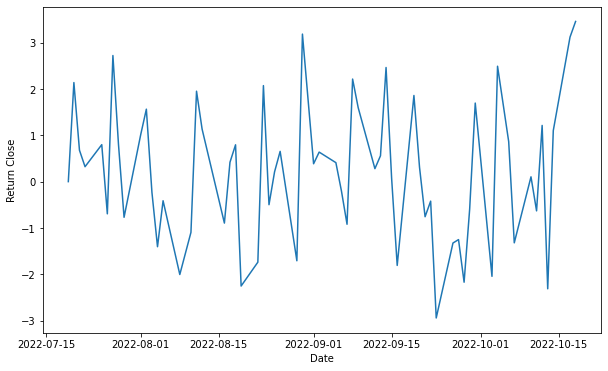

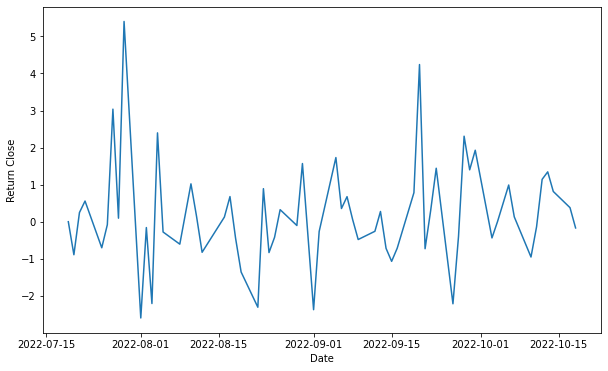

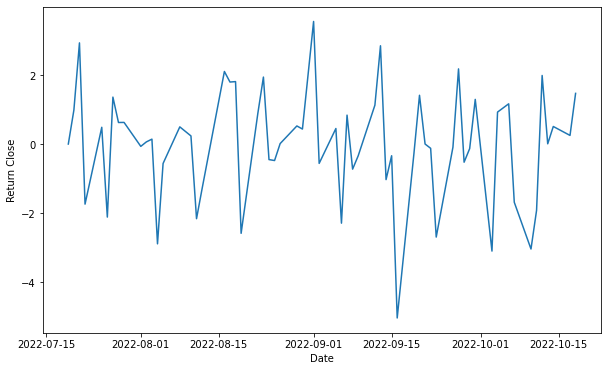

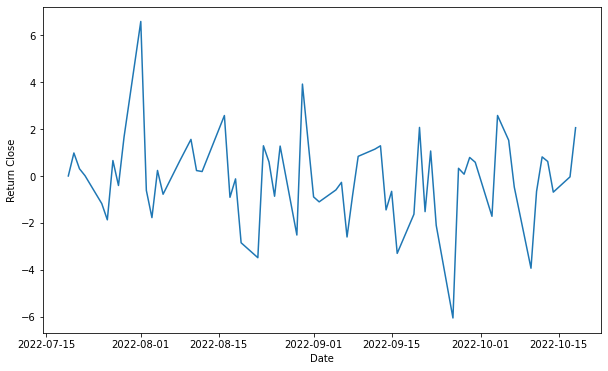

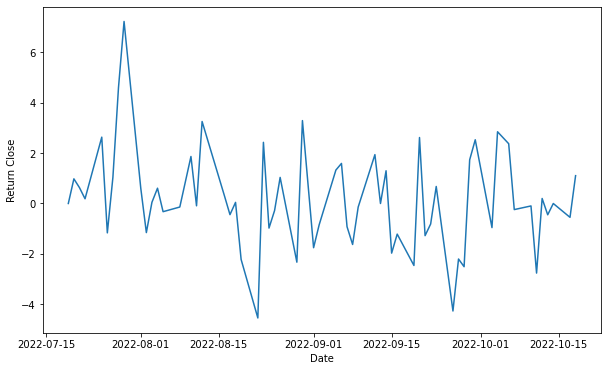

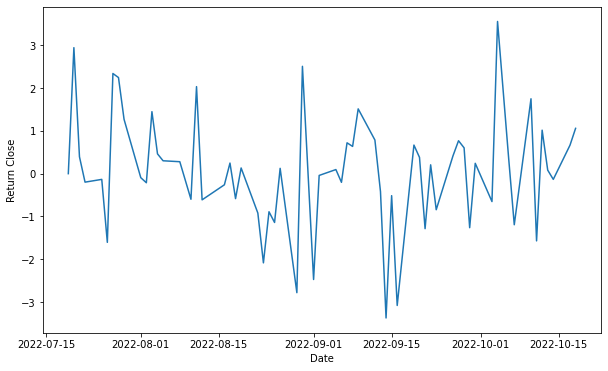

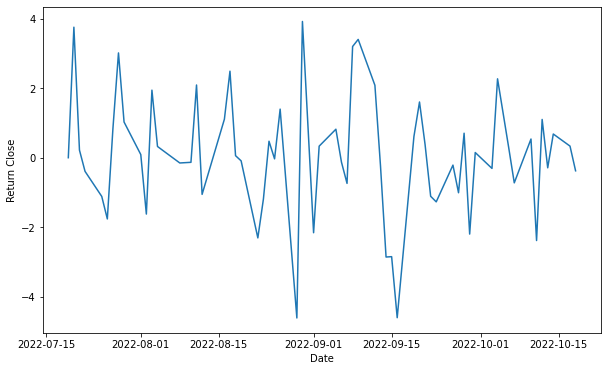

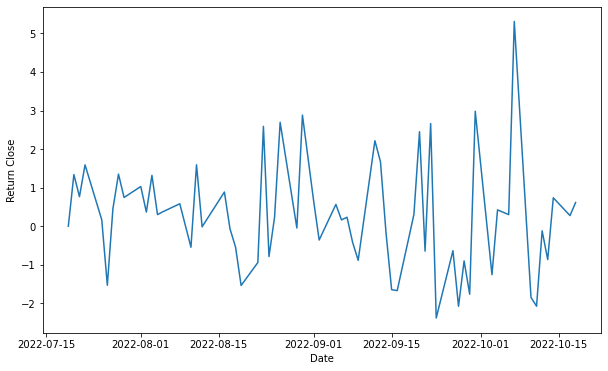

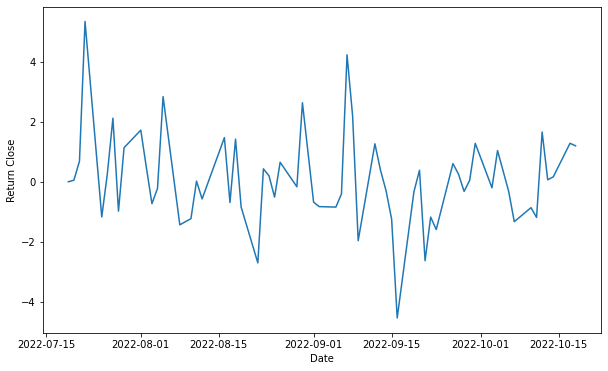

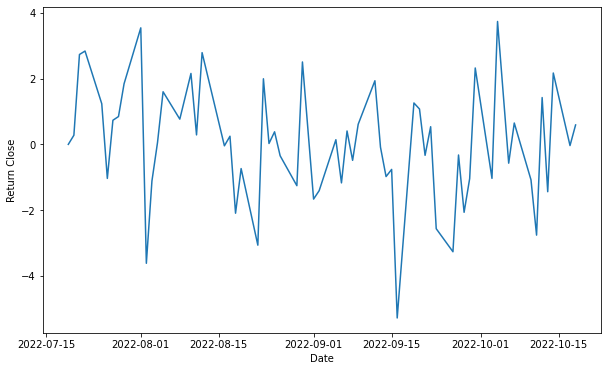

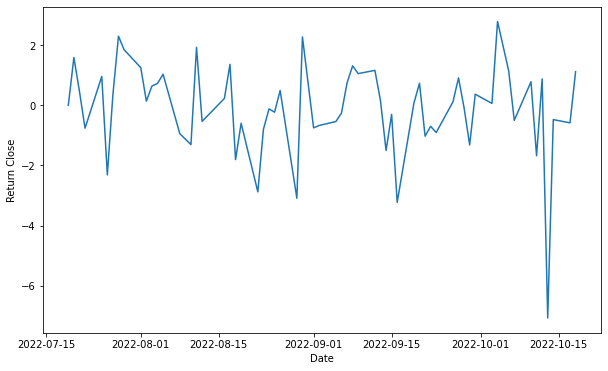

In [196]:
get_return(r'C:\Users\Kshitiz\Desktop\Work\Study\Python\NIFTY50',plot = True)